In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
amoc = pd.read_csv('amoc_1000_years.csv')

In [5]:
amoc.head()

,Temperature,Salinity,time,AMOC
0,0.5,0.5,0.00,0.000000
1,0.5,0.5,0.01,0.005357
2,0.5,0.5,0.02,0.010352
3,0.5,0.5,0.03,0.014068
4,0.5,0.5,0.04,0.017433


In [42]:
#get label for T and S pairs
amoc['Trajectory'] = amoc.apply(lambda row: f"T={row['Temperature']}, S={row['Salinity']}", axis=1)

#drop rows where timepoint is low
amoc_dropped = amoc.loc[amoc['time']>=10]
amoc_dropped.head()

,Temperature,Salinity,time,AMOC,Trajectory
1000,0.5,0.5,10.0001,0.159379,"T=0.5, S=0.5"
1001,0.5,0.5,10.0101,0.161165,"T=0.5, S=0.5"
1002,0.5,0.5,10.0201,0.159596,"T=0.5, S=0.5"
1003,0.5,0.5,10.0301,0.158735,"T=0.5, S=0.5"
1004,0.5,0.5,10.0401,0.156663,"T=0.5, S=0.5"


Text(0.5, 1.0, 'AMOC Index Over Time for 4 Starting Points')

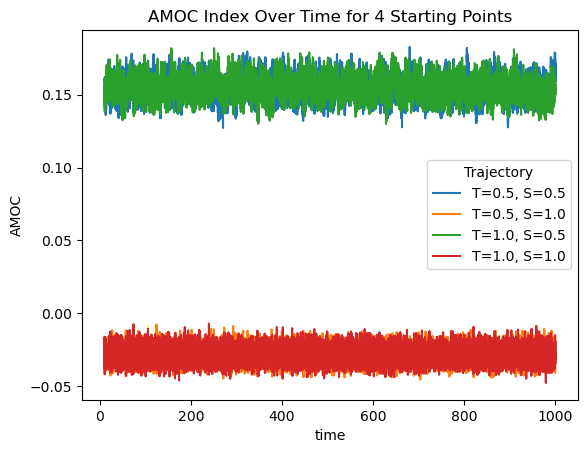

In [43]:
plt.figure()
sns.lineplot(data=amoc_dropped,x='time',y='AMOC', hue='Trajectory')
plt.title("AMOC Index Over Time for 4 Starting Points")

In [78]:
#find mean and standard deviation for Amoc index

#filter dfs to two different attractors
amoc_on = amoc_dropped.loc[amoc_dropped['AMOC']>=0.05]
amoc_off = amoc_dropped.loc[amoc_dropped['AMOC']<0.05]

#filter dfs to only one trajectory (will change this later when we make it a function)
on_trajone = amoc_on.loc[amoc_on['Trajectory']=='T=0.5, S=0.5']
print(len(on_trajone))
#put amoc values in arrays for handling
on_array = on_trajone['AMOC'].tolist()
off_array = amoc_off['AMOC'].tolist()

#find mean and standard deviation
on_mean = np.mean(on_array)
off_mean = np.mean(off_array)
on_std_dev = np.std(on_array)
off_std_dev = np.std(off_array)

#do 3 std dev above mean
threshold_on = on_mean + 3*on_std_dev
threshold_off = off_mean + 3*off_std_dev
print(threshold_on,threshold_off)

99000
0.17548220067063935 -0.014318795045701788


In [87]:
#find probability for events 3 std dev above mean
value_counter=0
for value in on_array:
    if value>=threshold_on:
        #print('yes')
        value_counter+=1
        #print('value_counter: ',value_counter)
    #print(value)
print(len(on_array))
print(value_counter)
probability_a = value_counter/(len(on_array))
print(probability_a)

99000
166
0.0016767676767676769


In [ ]:
on_variance = on_std_dev**2
auto_corrs = []
auto_corrs_with_negative = []
#auto-correlation function
#Multiply each 𝑋[𝑖] by 𝑋[𝑖+ℓ] for all valid 𝑖
product=0
sum=0
expectation=0
for lag in range(len(on_array)):
    for value in range(len(on_array)-lag):
        #print('value ',on_array[value])
        #print('value: ',value,' value of on array: ',on_array[value],'value + lag: ',value+lag,'value+lag of on array: ',on_array[value + lag])
        product = on_array[value]*on_array[value+lag]
        #print('product ',product)
        sum=sum+product
        #print('sum ',sum)
    #Take the average (sum over all 𝑖 divided by number of terms = 𝑁−ℓ)
    expectation=sum/(len(on_array)-lag)
    sum=0
    #Subtract 𝜇2 and divide by 𝜎2
    auto_correlation = (expectation-on_mean**2)/on_variance
    #print('Auto-correlation:',auto_correlation)
    auto_corrs_with_negative.append(auto_correlation)
    if (auto_correlation>0):
        auto_corrs.append(auto_correlation)
    #print(lag)

#print(expectation)

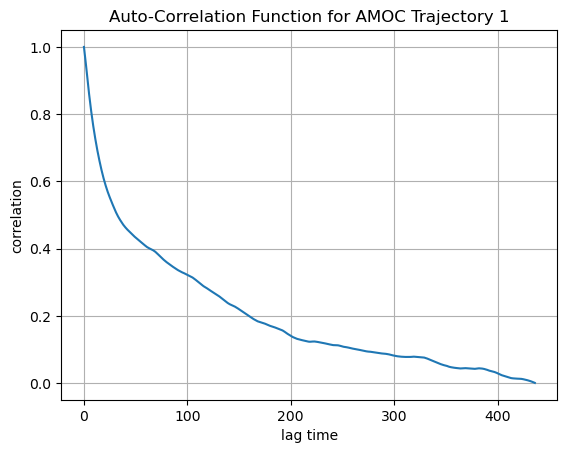

In [76]:
#plot autocorrelation function
plt.figure()
plt.plot(auto_corrs)
plt.title('Auto-Correlation Function for AMOC Trajectory 1')
plt.xlabel('lag time')
plt.ylabel('correlation')
plt.grid()

In [90]:
#integral auto-correlation function
print(len(auto_corrs))
print(len(auto_corrs_with_negative))

437
438


In [ ]:
#return time (system memory)